<a href="https://colab.research.google.com/github/medinadiegoeverardo/DS-Unit-2-Kaggle-Challenge/blob/master/module_2/medinadiego_2_assignment_kaggle_challenge_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Kaggle Challenge, Module 2

## Assignment
- [ ] Read [“Adopting a Hypothesis-Driven Workflow”](https://outline.com/5S5tsB), a blog post by a Lambda DS student about the Tanzania Waterpumps challenge.
- [ ] Continue to participate in our Kaggle challenge.
- [ ] Try Ordinal Encoding.
- [ ] Try a Random Forest Classifier.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.

## Stretch Goals

### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Do more exploratory data analysis, data cleaning, feature engineering, and feature selection.
- [ ] Try other [categorical encodings](https://contrib.scikit-learn.org/categorical-encoding/).
- [ ] Get and plot your feature importances.
- [ ] Make visualizations and share on Slack.

### Reading

Top recommendations in _**bold italic:**_

#### Decision Trees
- A Visual Introduction to Machine Learning, [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/),  and _**[Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)**_
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU)

#### Random Forests
- [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/), Chapter 8: Tree-Based Methods
- [Coloring with Random Forests](http://structuringtheunstructured.blogspot.com/2017/11/coloring-with-random-forests.html)
- _**[Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)**_

#### Categorical encoding for trees
- [Are categorical variables getting lost in your random forests?](https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/)
- [Beyond One-Hot: An Exploration of Categorical Variables](http://www.willmcginnis.com/2015/11/29/beyond-one-hot-an-exploration-of-categorical-variables/)
- _**[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)**_
- _**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)**_
- [Mean (likelihood) encodings: a comprehensive study](https://www.kaggle.com/vprokopev/mean-likelihood-encodings-a-comprehensive-study)
- [The Mechanics of Machine Learning, Chapter 6: Categorically Speaking](https://mlbook.explained.ai/catvars.html)

#### Imposter Syndrome
- [Effort Shock and Reward Shock (How The Karate Kid Ruined The Modern World)](http://www.tempobook.com/2014/07/09/effort-shock-and-reward-shock/)
- [How to manage impostor syndrome in data science](https://towardsdatascience.com/how-to-manage-impostor-syndrome-in-data-science-ad814809f068)
- ["I am not a real data scientist"](https://brohrer.github.io/imposter_syndrome.html)
- _**[Imposter Syndrome in Data Science](https://caitlinhudon.com/2018/01/19/imposter-syndrome-in-data-science/)**_


### More Categorical Encodings

**1.** The article **[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)** mentions 4 encodings:

- **"Categorical Encoding":** This means using the raw categorical values as-is, not encoded. Scikit-learn doesn't support this, but some tree algorithm implementations do. For example, [Catboost](https://catboost.ai/), or R's [rpart](https://cran.r-project.org/web/packages/rpart/index.html) package.
- **Numeric Encoding:** Synonymous with Label Encoding, or "Ordinal" Encoding with random order. We can use [category_encoders.OrdinalEncoder](https://contrib.scikit-learn.org/categorical-encoding/ordinal.html).
- **One-Hot Encoding:** We can use [category_encoders.OneHotEncoder](http://contrib.scikit-learn.org/categorical-encoding/onehot.html).
- **Binary Encoding:** We can use [category_encoders.BinaryEncoder](http://contrib.scikit-learn.org/categorical-encoding/binary.html).


**2.** The short video 
**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)** introduces an interesting idea: use both X _and_ y to encode categoricals.

Category Encoders has multiple implementations of this general concept:

- [CatBoost Encoder](http://contrib.scikit-learn.org/categorical-encoding/catboost.html)
- [James-Stein Encoder](http://contrib.scikit-learn.org/categorical-encoding/jamesstein.html)
- [Leave One Out](http://contrib.scikit-learn.org/categorical-encoding/leaveoneout.html)
- [M-estimate](http://contrib.scikit-learn.org/categorical-encoding/mestimate.html)
- [Target Encoder](http://contrib.scikit-learn.org/categorical-encoding/targetencoder.html)
- [Weight of Evidence](http://contrib.scikit-learn.org/categorical-encoding/woe.html)

Category Encoder's mean encoding implementations work for regression problems or binary classification problems. 

For multi-class classification problems, you will need to temporarily reformulate it as binary classification. For example:

```python
encoder = ce.TargetEncoder(min_samples_leaf=..., smoothing=...) # Both parameters > 1 to avoid overfitting
X_train_encoded = encoder.fit_transform(X_train, y_train=='functional')
X_val_encoded = encoder.transform(X_train, y_val=='functional')
```

For this reason, mean encoding won't work well within pipelines for multi-class classification problems.

**3.** The **[dirty_cat](https://dirty-cat.github.io/stable/)** library has a Target Encoder implementation that works with multi-class classification.

```python
 dirty_cat.TargetEncoder(clf_type='multiclass-clf')
```
It also implements an interesting idea called ["Similarity Encoder" for dirty categories](https://www.slideshare.net/GaelVaroquaux/machine-learning-on-non-curated-data-154905090).

However, it seems like dirty_cat doesn't handle missing values or unknown categories as well as category_encoders does. And you may need to use it with one column at a time, instead of with your whole dataframe.

**4. [Embeddings](https://www.kaggle.com/learn/embeddings)** can work well with sparse / high cardinality categoricals.

_**I hope it’s not too frustrating or confusing that there’s not one “canonical” way to encode categorcals. It’s an active area of research and experimentation! Maybe you can make your own contributions!**_

### Setup

You can work locally (follow the [local setup instructions](https://lambdaschool.github.io/ds/unit2/local/)) or on Colab (run the code cell below).

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [162]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

train.shape, test.shape

((59400, 41), (14358, 40))

In [0]:
train, validation = train_test_split(train, random_state=10)

### feature engineering

In [164]:
import numpy as np

def replacing_nulls(df):
  cols = df.columns
  cols = list(cols)
  those_null = []
  for col in cols:
    if df[col].isnull().any() == False:
      continue
    
    df[col] = df[col].replace(0, np.nan)
    those_null.append(col)
  return those_null

replacing_nulls(train)
replacing_nulls(validation)
replacing_nulls(test)

['funder',
 'installer',
 'subvillage',
 'public_meeting',
 'scheme_management',
 'scheme_name',
 'permit']

In [0]:
def replacing_dates(df):
  df['date_recorded'] = pd.to_datetime(df['date_recorded'], infer_datetime_format=True)
  df['year_recorded'] = df['date_recorded'].dt.year
  df['month_recorded'] = df['date_recorded'].dt.month
  df['day_recorded'] = df['date_recorded'].dt.day

replacing_dates(train)
replacing_dates(validation)
replacing_dates(test)

In [0]:
train = train.drop(columns='date_recorded')
validation = validation.drop(columns='date_recorded')
test = test.drop(columns='date_recorded')

In [77]:
validation.head()

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,year_recorded,month_recorded,day_recorded
46949,9678,0.0,Dwsp,0,DWE,0.000000,-2.000000e-08,Shule Ya Msingi Itubukilo,0,Lake Victoria,Itubukilo A,Shinyanga,17,1,Bariadi,Mbita,0,NaN,GeoData Consultants Ltd,WUG,NaN,False,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional,2013,2,1
51178,43144,1000.0,Stantons,950,World Vision,35.733914,-3.810443e+00,Kisese B,0,Internal,Kisese B,Manyara,21,1,Babati,Magara,245,True,GeoData Consultants Ltd,VWC,NaN,True,2012,nira/tanira,nira/tanira,handpump,vwc,user-group,pay when scheme fails,on failure,soft,good,enough,enough,hand dtw,borehole,groundwater,hand pump,hand pump,functional,2013,3,7
38686,70940,0.0,Dwsp,0,DWE,0.000000,-2.000000e-08,Ngwande,0,Lake Victoria,Madukani,Shinyanga,17,1,Bariadi,Kinang'weli,0,NaN,GeoData Consultants Ltd,WUG,NaN,False,0,other,other,other,wug,user-group,unknown,unknown,soft,good,enough,enough,shallow well,shallow well,groundwater,other,other,non functional,2013,1,22
54767,66151,20.0,Po,441,Po,37.121775,-6.693746e+00,Kwa Vilore,0,Wami / Ruvu,Batini B,Morogoro,5,1,Kilosa,Chanzuru,105,True,GeoData Consultants Ltd,VWC,NaN,True,1976,swn 80,swn 80,handpump,vwc,user-group,pay per bucket,per bucket,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,non functional,2011,2,1
34402,9248,0.0,Jica,0,DWE,31.156491,-1.379942e+00,Kwa Gabriel,0,Lake Victoria,Kishegeshe A,Kagera,18,1,Karagwe,Kihanga,0,True,GeoData Consultants Ltd,VWC,Katanda Water Sup,True,0,gravity,gravity,gravity,other,other,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,non functional,2011,7,5


In [49]:
train.describe(include=['O'])

,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
count,41811,41794,44550,44550,44261,44550,44550,44550,38204,44550,41632,23407,29105,44550,44550,44550,44550,44550,44550,44550,44550,44550,44550,44550,44550,44550,44550,44550,44550,44550
unique,1629,1840,28953,9,16658,21,125,2080,1,1,12,2482,1,18,13,7,12,5,7,7,8,6,5,5,10,7,3,7,6,3
top,Government Of Tanzania,DWE,none,Lake Victoria,Madukani,Iringa,Njombe,Igosi,True,GeoData Consultants Ltd,VWC,K,True,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
freq,6798,13020,2708,7746,387,3984,1861,228,38204,44550,27593,513,29105,20084,20084,20084,30318,39340,18963,18963,38054,38054,24869,24869,12754,12754,34320,21387,25971,24106


In [0]:
# non_numeric = train.describe(include=['O'])
# non_list = list(non_numeric.columns)

In [0]:
target = 'status_group'

# dataframe with all train columns except the target
train_features = train.drop(columns=[target])

# get all column names
features = train_features.columns.tolist()

### baseline

In [0]:
x_train = train[features]
y_train = train[target]
x_val = validation[features]
y_val = validation[target]
x_test = test[features]

In [145]:
from sklearn.metrics import accuracy_score

majority_class_2 = y_val.mode()[0]
y_predict = [majority_class_2] * len(y_val)
ac_v = accuracy_score(y_val, y_predict)
print('Validation accuracy score: ', str(ac_v))

Validation accuracy score:  0.549023569023569


In [80]:
x_train.head()

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,year_recorded,month_recorded,day_recorded
37648,25077,1000.0,Dhv,370,DWE,36.514517,-8.549106,Kwa Chapanga,0,Rufiji,Magereza,Morogoro,5,4,Ulanga,Iragua,290,True,GeoData Consultants Ltd,NaN,NaN,True,2003,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,2011,3,23
17049,73674,0.0,NaN,0,NaN,31.788171,-1.365555,Kirombe 'A',0,Lake Victoria,Kigazi,Kagera,18,6,Bukoba Urban,Kitendaguru,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,improved spring,improved spring,2011,8,6
42569,10731,0.0,Ridep,0,RIDEP,33.019772,-3.059272,Kwa Hene,0,Lake Victoria,Mission,Mwanza,19,7,Missungwi,Buhingo,0,NaN,GeoData Consultants Ltd,VWC,NaN,False,0,other - swn 81,other handpump,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,2011,7,31
58401,3668,500.0,Norad,896,RWE,29.657789,-4.817105,Kwa Mzee Juma Chobaliko,0,Lake Tanganyika,Bigabilo A,Kigoma,16,3,Kigoma Rural,Kagongo,566,True,GeoData Consultants Ltd,VWC,Mkongoro One,True,1985,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe multiple,communal standpipe,2013,1,15
49211,29190,50.0,Amref,236,Amref,39.736233,-10.548224,Kwa Mselemu,0,Ruvuma / Southern Coast,Bara,Mtwara,99,1,Mtwara Rural,Njengwa,120,True,GeoData Consultants Ltd,VWC,Nalunga water supply,True,2011,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,salty,salty,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,2013,2,23


In [171]:
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='mean'), 
    RandomForestClassifier(n_estimators=200, random_state=10, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(x_train, y_train)
print('Validation Accuracy', pipeline.score(x_val, y_val))

Validation Accuracy 0.8116498316498316


In [172]:
# Pipeline’s named_steps attribute allows accessing steps by name

encoder = pipeline.named_steps['ordinalencoder']
#encoded = ce.OrdinalEncoder(x_train)
encoded = encoder.transform(x_train)
encoded.head()

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,year_recorded,month_recorded,day_recorded
37648,25077,1000.0,1,370,1,36.514517,-8.549106,1,0,1,1,1,5,4,1,1,290,1,1,1,1,1,2003,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2011,3,23
17049,73674,0.0,2,0,2,31.788171,-1.365555,2,0,2,2,2,18,6,2,2,0,1,1,2,1,2,0,2,2,2,1,1,2,2,1,1,1,1,2,2,1,2,2,2011,8,6
42569,10731,0.0,3,0,3,33.019772,-3.059272,3,0,2,3,3,19,7,3,3,0,2,1,2,1,2,0,3,3,1,1,1,2,2,1,1,1,1,3,3,1,1,1,2011,7,31
58401,3668,500.0,4,896,4,29.657789,-4.817105,4,0,3,4,4,16,3,4,4,566,1,1,2,2,1,1985,2,2,2,1,1,1,1,1,1,2,2,4,4,2,3,3,2013,1,15
49211,29190,50.0,5,236,5,39.736233,-10.548224,5,0,4,5,5,99,1,5,5,120,1,1,2,3,1,2011,4,4,3,1,1,3,3,2,2,1,1,3,3,1,3,3,2013,2,23


In [173]:
random_forest = pipeline.named_steps['randomforestclassifier']
important = pd.Series(random_forest.feature_importances_, encoded.columns)
important_list = list(important.sort_values()[-10:].index)
important.sort_values()[-10:]

day_recorded         0.033722
construction_year    0.035180
gps_height           0.040486
subvillage           0.046746
wpt_name             0.048345
id                   0.051263
quantity_group       0.059531
latitude             0.069097
longitude            0.070895
quantity             0.073921
dtype: float64

In [153]:
def commonalities(ls1, ls2):
  common = []
  for i in ls1:
    for j in ls2:
      if j == i:
        if j not in common:
          common.append(j)
  return common

commonalities(non_list, important_list)

['wpt_name', 'subvillage', 'quantity', 'quantity_group']

In [157]:
common = commonalities(non_list, important_list)
print(f'These were categorical: {common}')

These were categorical: ['wpt_name', 'subvillage', 'quantity', 'quantity_group']


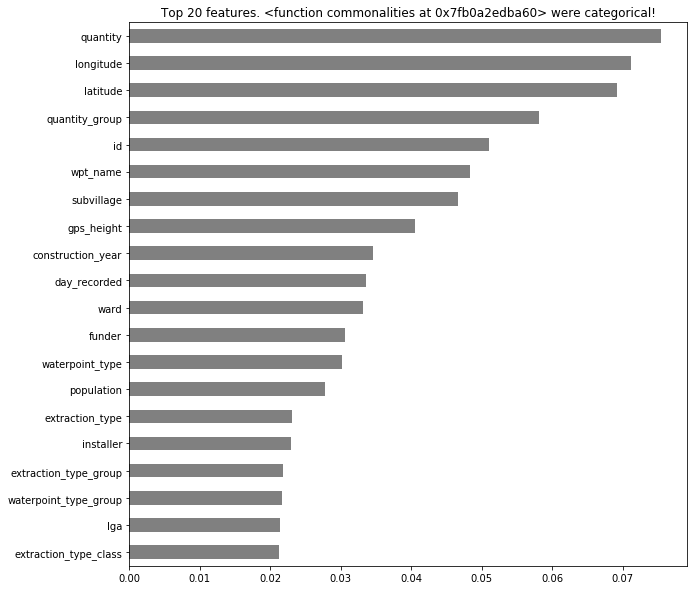

In [142]:
%matplotlib inline
import matplotlib.pyplot as plt

# Get feature importances
#random_forest = pipeline.named_steps['randomforestclassifier']
#importances = pd.Series(random_forest.feature_importances_, encoded.columns)

# Plot feature importances
n = 20
#common = commonalities
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
important.sort_values()[-n:].plot.barh(color='grey');

In [174]:
y_pred = pipeline.predict(x_test)
print('prediction: ', y_pred)

prediction:  ['non functional' 'functional' 'functional' ... 'functional' 'functional'
 'non functional']


In [0]:
submission = sample_submission.copy()
submission['status_group'] = y_pred

In [176]:
submission.head()

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional


In [0]:
submission.to_csv('medinadiegokaggle_2.csv', index=False)

In [0]:
from google.colab import files
files.download('medinadiegokaggle_2.csv')